### 8.3.1 Batch Normalization

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.optim as optim

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
trainset = torchvision.datasets.FashionMNIST(root='/content/drive/MyDrive/Colab Notebooks/Euron',
                                             train=True,
                                             download=True,
                                             transform=transforms.ToTensor())

In [ ]:
batch_size = 4
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
### trainloader 변수가 호출될 때 데이터셋을 메모리로 가져옴 ###
### batch size가 4이므로 데이터를 한 번에 4개씩 쪼개서 가져옴 ###

In [ ]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(images[0].shape)
print(labels[0].item())

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
9


In [ ]:
def imshow(img, title):
    plt.figure(figsize=(batch_size * 4, 4))
    plt.axis('off')
    plt.imshow(np.transpose(img, (1, 2, 0))) #[C,H,W] -> [H,W,C]
    plt.title(title)
    plt.show()

In [ ]:
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))

    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])

    return images, labels

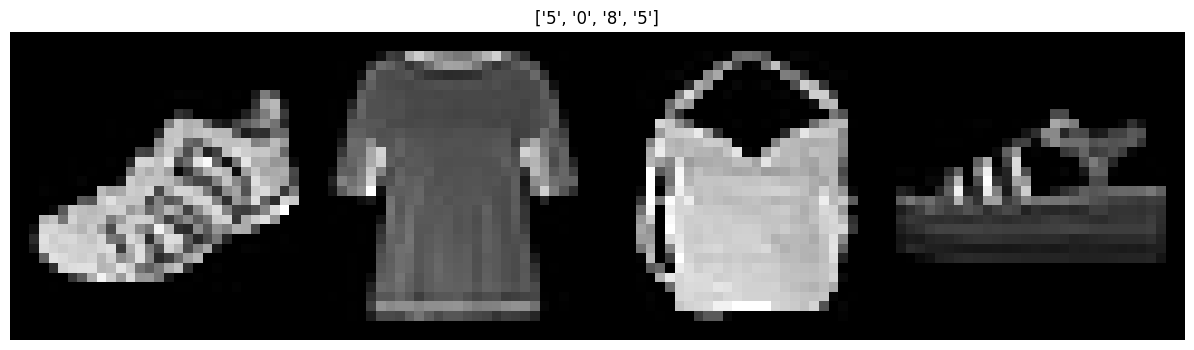

In [ ]:
images, labels = show_batch_images(trainloader)

'5' : 'Sandal'

'0' : 'T-Shirt/Top'

'8' : 'Bag'

'5' : 'Sandal'

In [ ]:
# Batch Normalization 적용 X 네트워크
class NormalNet(nn.Module):
    def __init__(self):
        super(NormalNet, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(784, 48),  # 28 x 28 = 784
            nn.ReLU(),
            nn.Linear(48, 24),
            nn.ReLU(),
            nn.Linear(24, 10)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [ ]:
# Batch Normalization 적용 O 네트워크
class BNNet(nn.Module):
    def __init__(self):
        super(BNNet, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(784, 48),
            nn.BatchNorm1d(48),
            nn.ReLU(),
            nn.Linear(48, 24),
            nn.BatchNorm1d(24),
            nn.ReLU(),
            nn.Linear(24, 10)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [ ]:
model = NormalNet()
print(model)

NormalNet(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): ReLU()
    (2): Linear(in_features=48, out_features=24, bias=True)
    (3): ReLU()
    (4): Linear(in_features=24, out_features=10, bias=True)
  )
)


In [ ]:
model_bn = BNNet()
print(model_bn)

BNNet(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=48, out_features=24, bias=True)
    (4): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=24, out_features=10, bias=True)
  )
)


In [ ]:
batch_size = 512
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(model.parameters(), lr=0.01)
opt_bn = optim.SGD(model_bn.parameters(), lr=0.01)

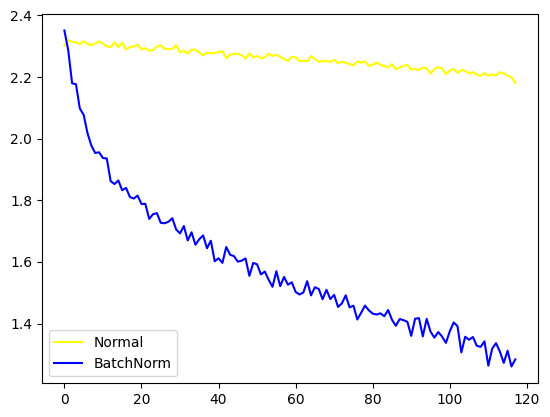

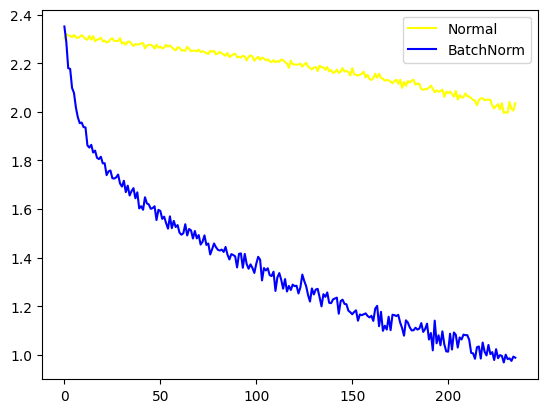

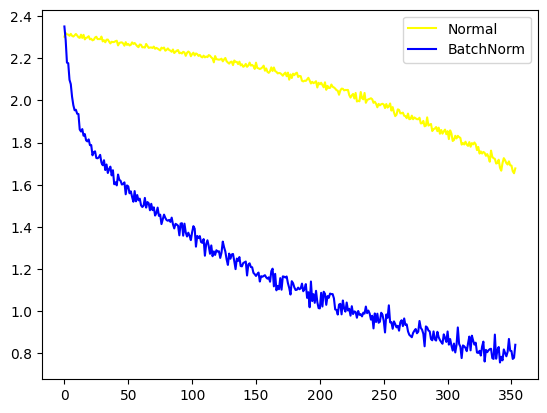

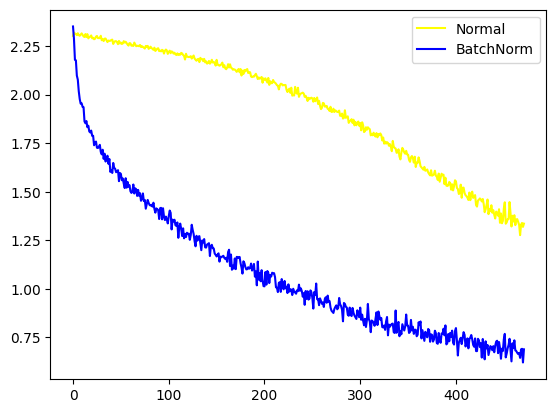

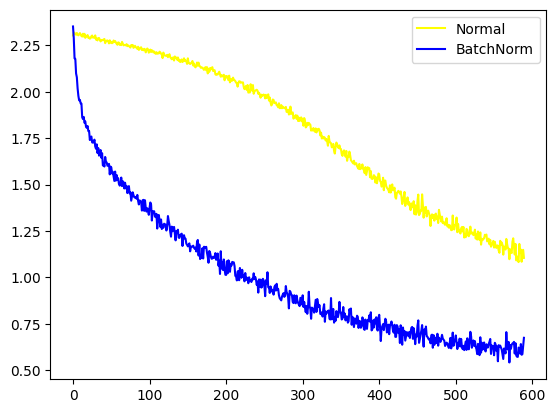

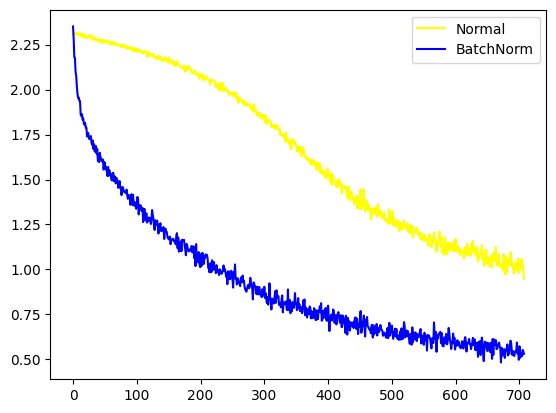

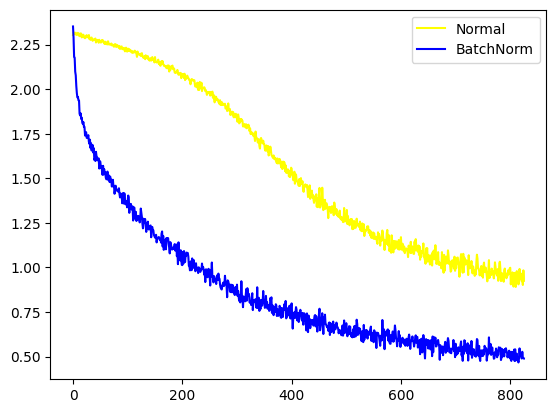

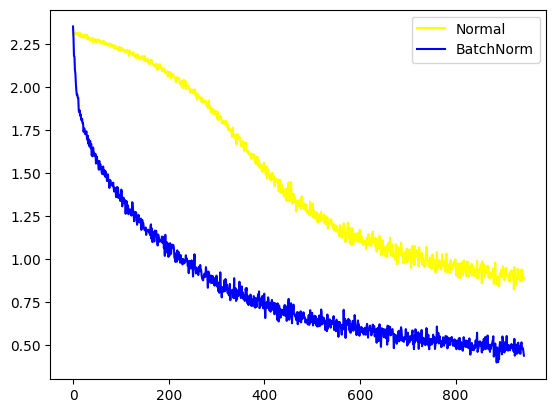

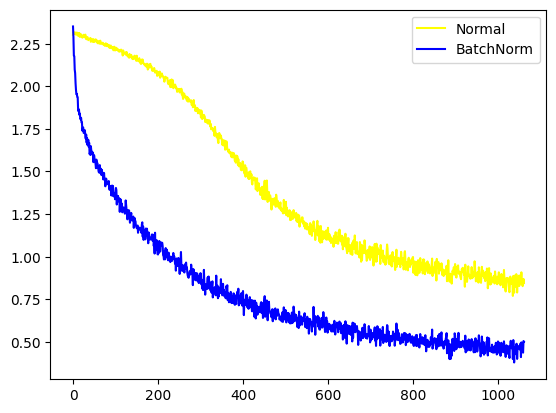

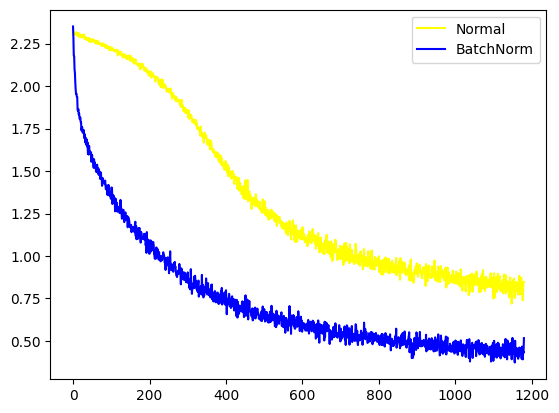

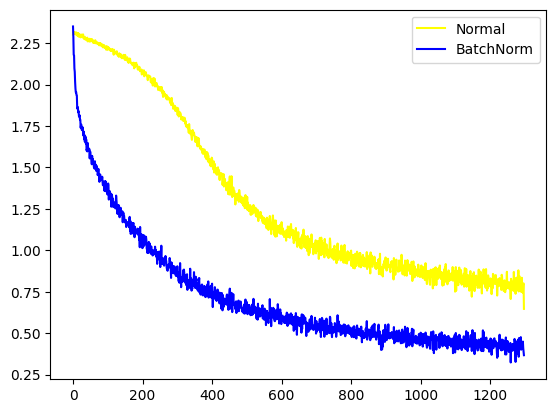

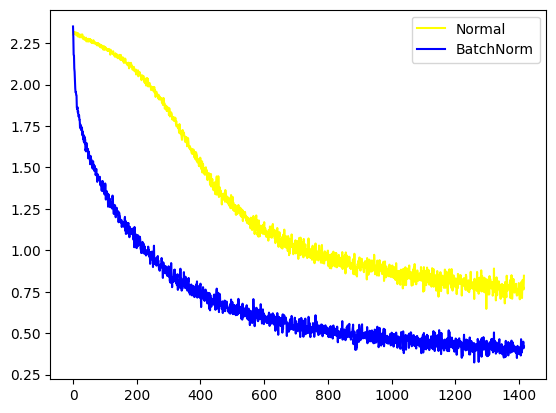

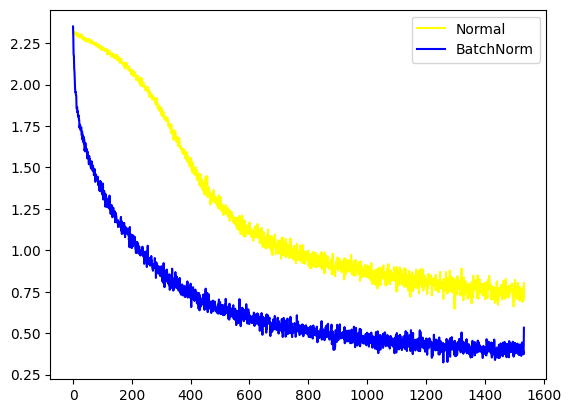

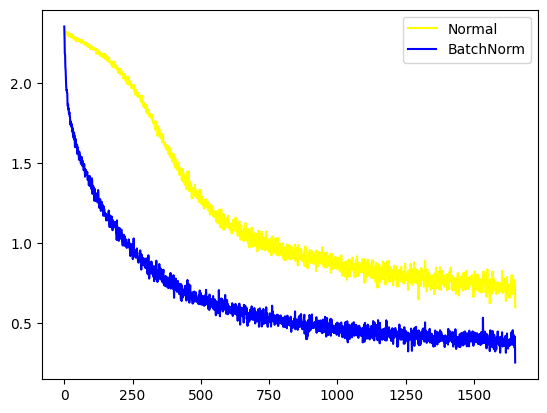

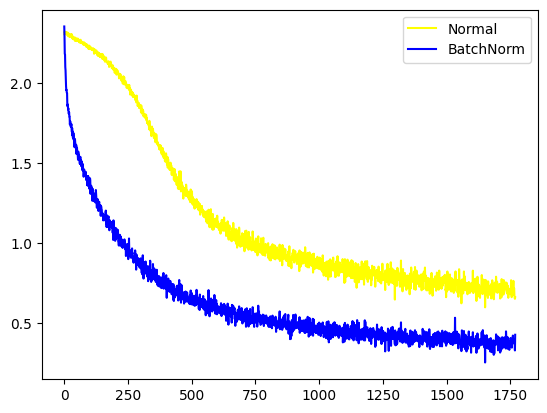

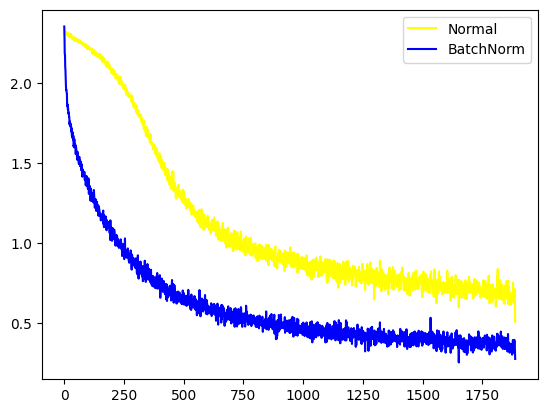

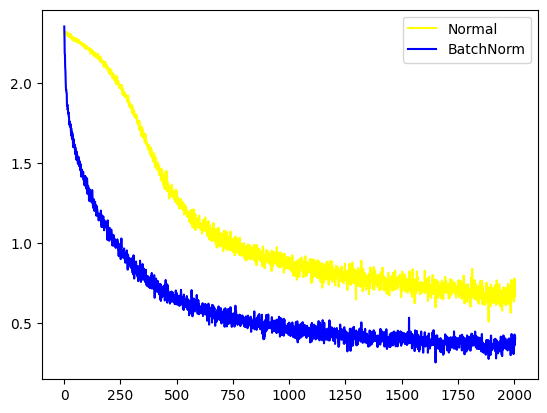

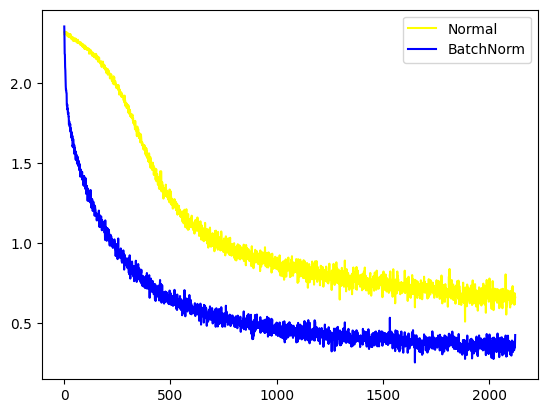

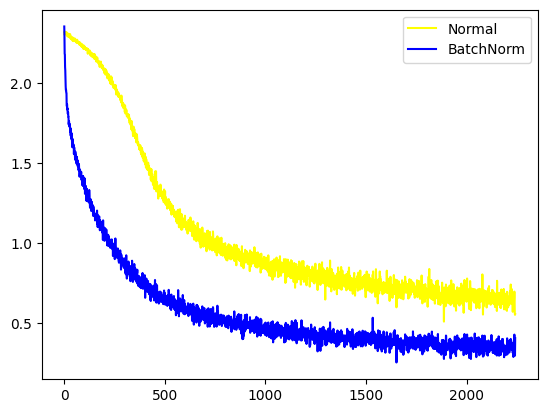

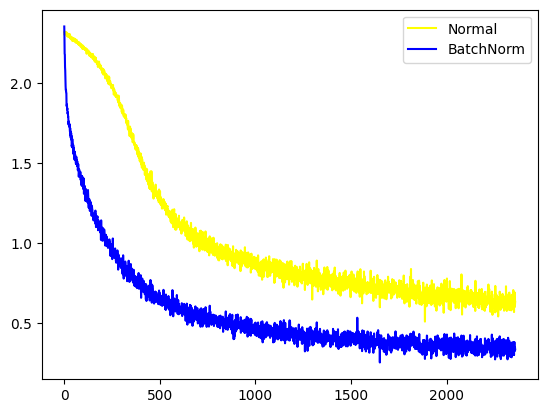

In [ ]:
loss_arr = []
loss_bn_arr = []
max_epochs = 20

for epoch in range(max_epochs):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs, labels
        opt.zero_grad() # BN 적용되지 않은 모델의 학습
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()

        opt_bn.zero_grad() # BN 적용된 모델의 학습
        outputs_bn = model_bn(inputs)
        loss_bn = loss_fn(outputs_bn, labels)
        loss_bn.backward()
        opt_bn.step()

        loss_arr.append(loss.item())
        loss_bn_arr.append(loss_bn.item())

    plt.plot(loss_arr, 'yellow', label='Normal')
    plt.plot(loss_bn_arr, 'blue', label='BatchNorm')
    plt.legend()
    plt.show()

BN 적용된 모델 : 에포크가 진행될수록 loss도 줄어들면서 안정적인 학습을 하고 있음 (더 낮은 값으로, 안정적인 범위 내에서 줄어드는 loss)

### 8.3.2 Dropout

In [ ]:
N = 50
noise = 0.3

x_train = torch.unsqueeze(torch.linspace(-1, 1, N), 1) # Training dataset이 -1~1의 값을 갖도록 조정
                                                       # 주어진 범위에서 균등한 값을 갖는 텐서
y_train = x_train + noise * torch.normal(torch.zeros(N, 1), torch.ones(N, 1)) # Training dataset 값의 범위가 정규분포를 갖도록 조정
#x_train, y_train= x_train.to(device), y_train.to(device)
x_test = torch.unsqueeze(torch.linspace(-1, 1, N), 1)
y_test = x_test + noise * torch.normal(torch.zeros(N, 1), torch.ones(N, 1))
#x_test, y_test = x_test.to(device), y_test.to(device)

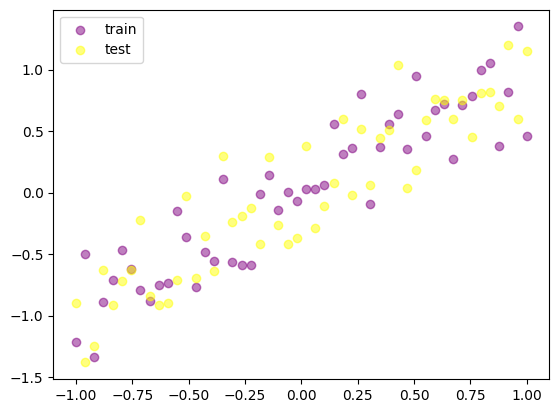

In [ ]:
plt.scatter(x_train.data.numpy(), y_train.data.numpy(), c='purple', alpha=0.5, label='train')
plt.scatter(x_test.data.numpy(), y_test.data.numpy(), c='yellow', alpha=0.5, label='test')
plt.legend()
plt.show()

In [ ]:
N_h = 100

# Dropout 적용 X
model = torch.nn.Sequential(
    torch.nn.Linear(1, N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, 1),
)

# Dropout 적용 O
model_dropout = torch.nn.Sequential(
    torch.nn.Linear(1, N_h),
    torch.nn.Dropout(0.2),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, N_h),
    torch.nn.Dropout(0.2),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, 1),
)

In [ ]:
opt = torch.optim.Adam(model.parameters(), lr=0.01)
opt_dropout = torch.optim.Adam(model_dropout.parameters(), lr=0.01)
loss_fn = torch.nn.MSELoss()

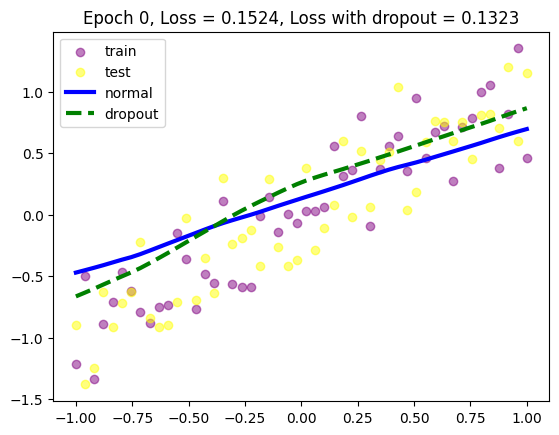

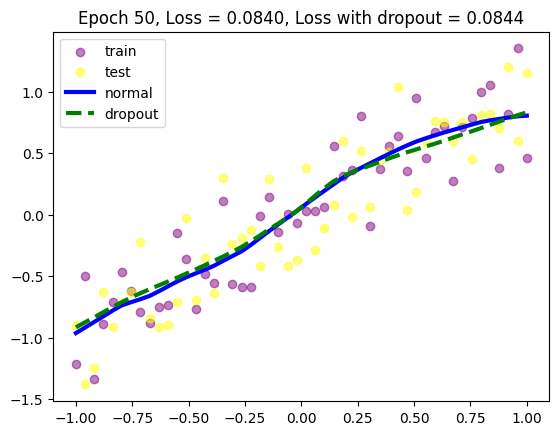

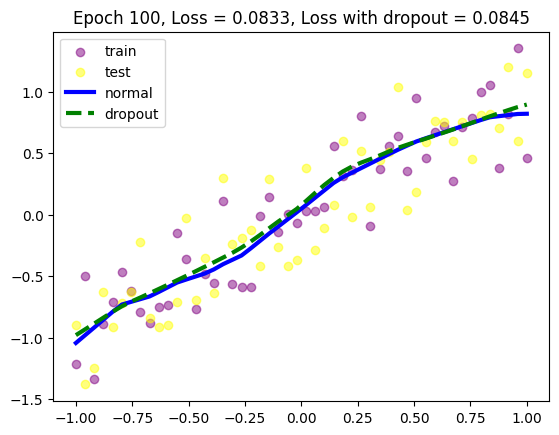

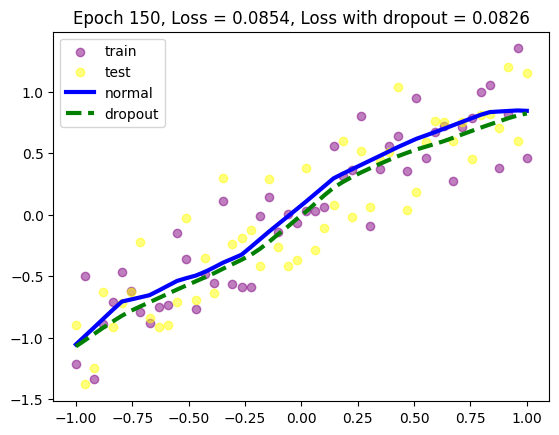

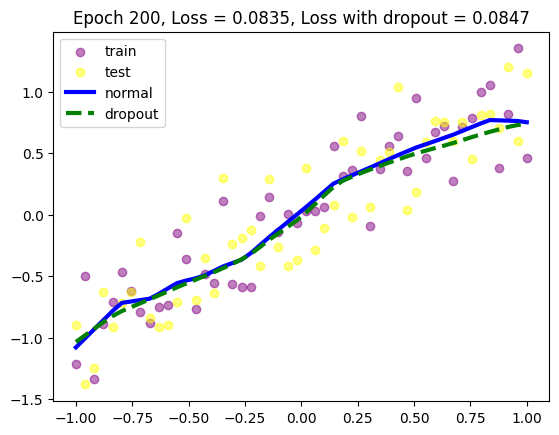

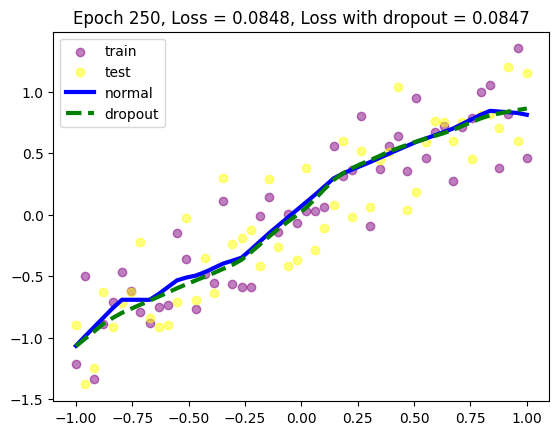

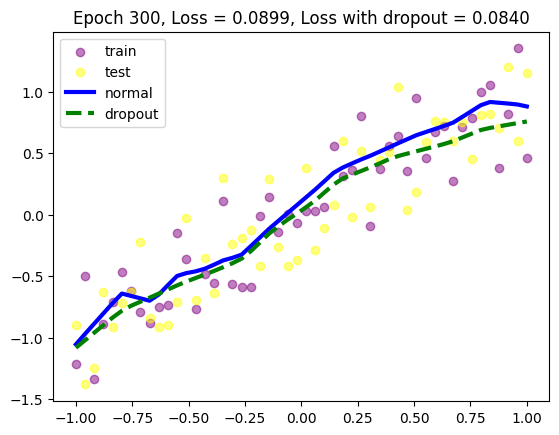

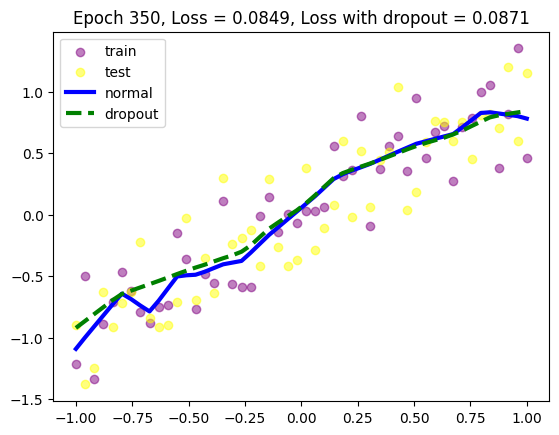

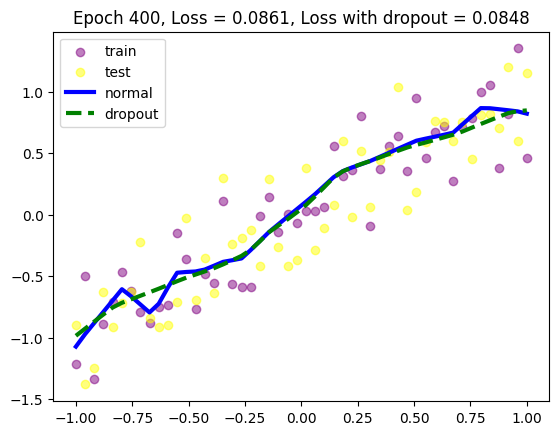

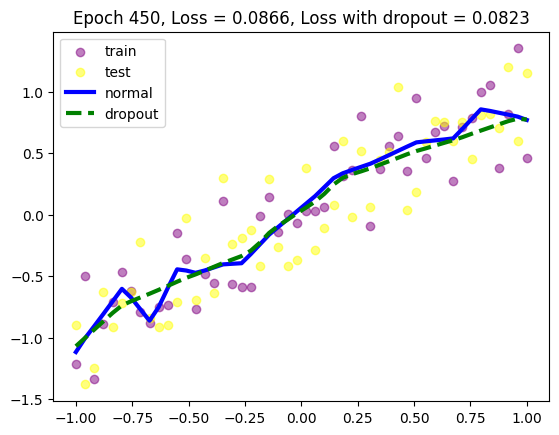

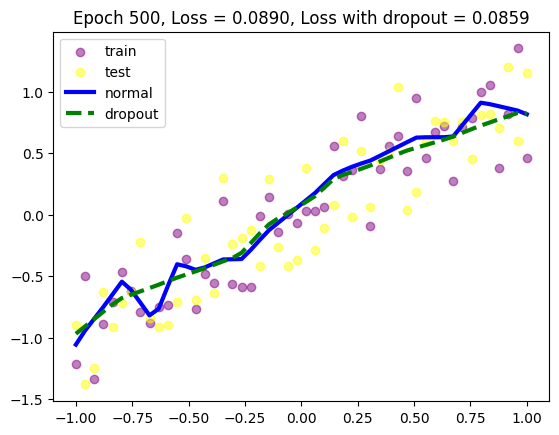

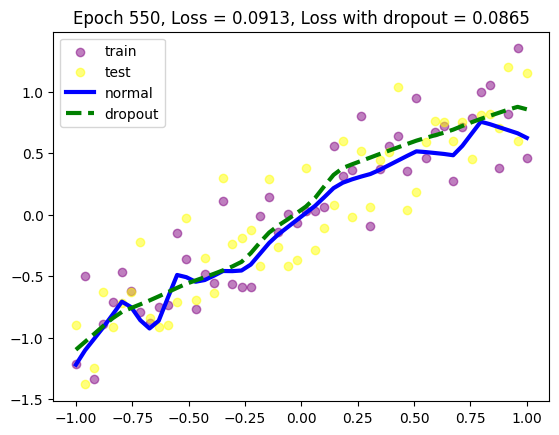

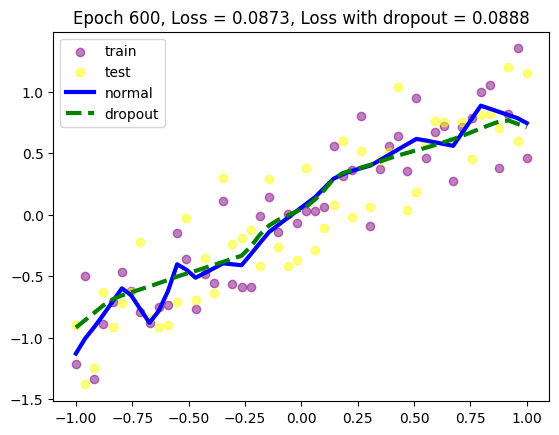

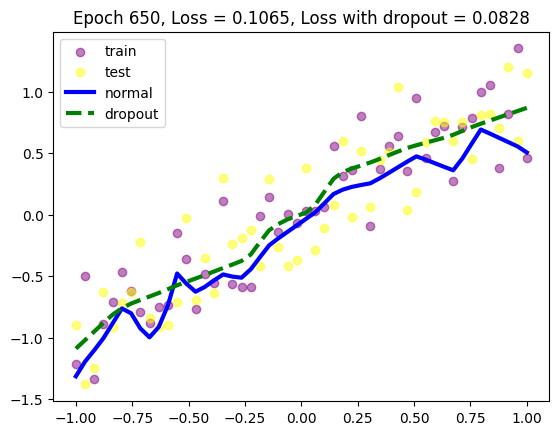

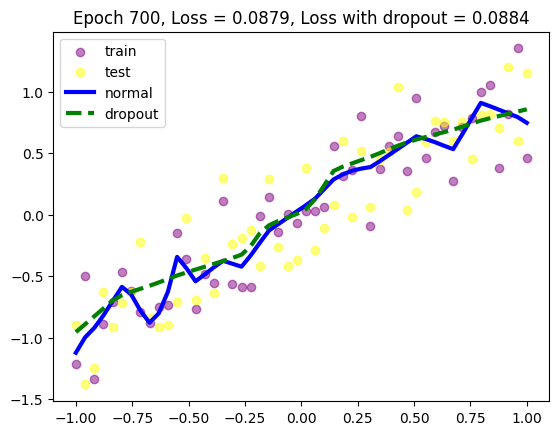

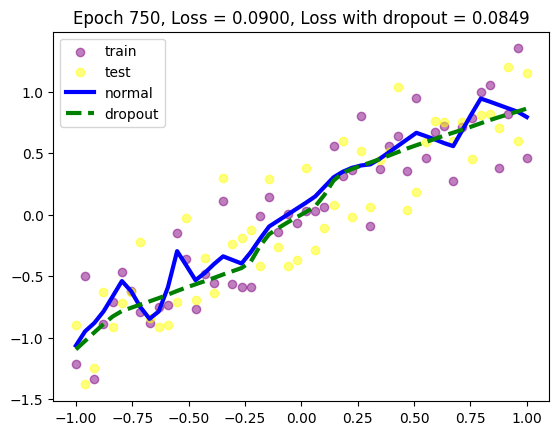

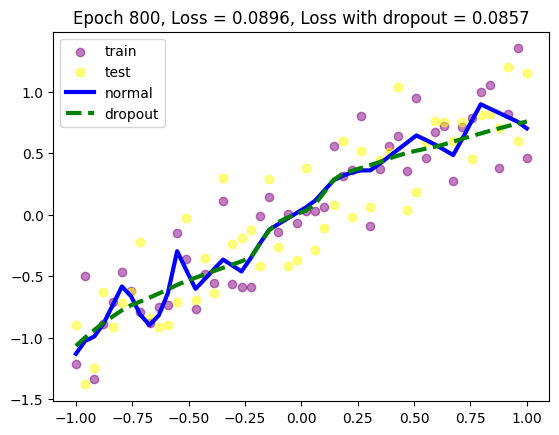

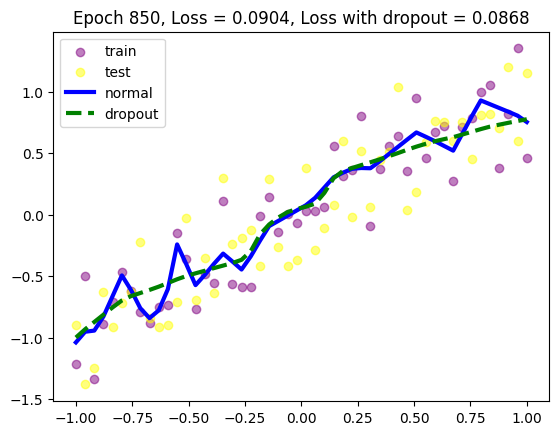

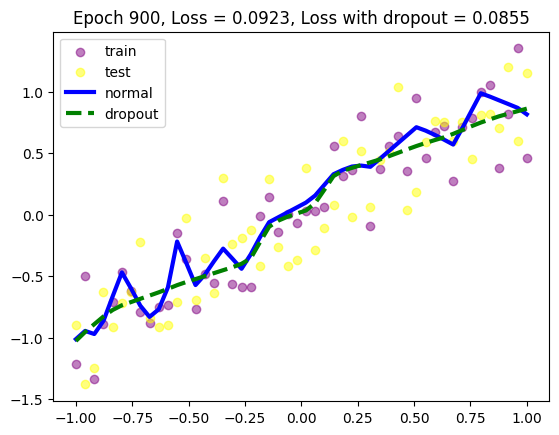

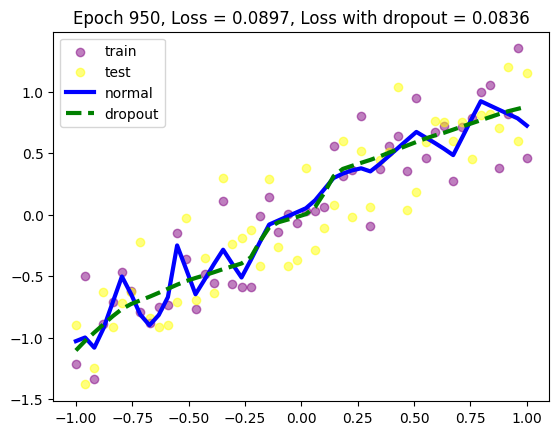

In [ ]:
max_epochs = 1000
for epoch in range(max_epochs):
    pred = model(x_train)
    loss = loss_fn(pred, y_train)
    opt.zero_grad()
    loss.backward()
    opt.step()

    pred_dropout = model_dropout(x_train)
    loss_dropout = loss_fn(pred_dropout, y_train)
    opt_dropout.zero_grad()
    loss_dropout.backward()
    opt_dropout.step()

    if epoch % 50 == 0:
        model.eval()
        model_dropout.eval()

        test_pred = model(x_test)
        test_loss = loss_fn(test_pred, y_test)

        test_pred_dropout = model_dropout(x_test)
        test_loss_dropout = loss_fn(test_pred_dropout, y_test)

        plt.scatter(x_train.data.numpy(), y_train.data.numpy(), c='purple', alpha=0.5, label='train')
        plt.scatter(x_test.data.numpy(), y_test.data.numpy(), c='yellow', alpha=0.5, label='test')
        plt.plot(x_test.data.numpy(), test_pred.data.numpy(), 'b-', lw=3, label='normal')
        plt.plot(x_test.data.numpy(), test_pred_dropout.data.numpy(), 'g--', lw=3,  label='dropout')

        plt.title('Epoch %d, Loss = %0.4f, Loss with dropout = %0.4f' % (epoch, test_loss, test_loss_dropout))
        plt.legend()
        model.train()
        model_dropout.train()
        plt.pause(0.05)

Training 횟수가 늘어날수록 파란색 실선은 보라색 점들에 점점 fit함

→ Dropout을 적용하지 않은 모델은 training dataset에 overfitting되는 양상을 보임

### 8.3.3 Early Stopping

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models # 사전 학습된 모델 이용
from torchvision import transforms, datasets

import matplotlib
import matplotlib.pyplot as plt
import time
import argparse
from tqdm import tqdm
matplotlib.style.use('ggplot')

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
train_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
val_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Euron

!unzip -qq "/content/drive/MyDrive/Colab Notebooks/Euron/archive.zip"

/content/drive/MyDrive/Colab Notebooks/Euron


In [ ]:
train_dataset = datasets.ImageFolder(
    root=r'/content/drive/MyDrive/Colab Notebooks/Euron/train',
    transform=train_transform
)
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=32, shuffle=True,
)
val_dataset = datasets.ImageFolder(
    root=r'/content/drive/MyDrive/Colab Notebooks/Euron/test',
    transform=val_transform
)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size=32, shuffle=False,
)

In [ ]:
def resnet50(pretrained=True):
    model = models.resnet50(progress=True, pretrained=pretrained)
    if requires_grad == False: # 파라미터 고정. backpropagation 중에 기울기 계산 X
        for param in model.parameters():
            param.requires_grad = False
    elif requires_grad == True: # 파라미터 값이 backpropagation 중에 기울기 계산에 반영됨
        for param in model.parameters():
            param.requires_grad = True
    model.fc = nn.Linear(2048, 2) # 최종 분류를 위한 계층은 학습을 진행함
    return model

In [ ]:
'''
### Learning rate decay ###

주어진 'patience' 횟수만큼 valid set에 대한 loss 감소가 없으면
주어진 'factor'만큼 learning rate를 감소시켜서
모델 학습의 최적화가 가능하도록 도와줌
'''
class LRScheduler():
    def __init__(
        self, optimizer, patience=5, min_lr=1e-6, factor=0.5
    ):
        self.optimizer = optimizer
        self.patience = patience
        self.min_lr = min_lr
        self.factor = factor
        self.lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
                self.optimizer,
                mode='min', # 모델의 val_loss를 학습률 조정의 기준으로 사용하므로
                patience=self.patience, # 학습률 업데이트 전에 몇 번의 에포크를 기다려야 하는지
                factor=self.factor, # 학습률을 얼마나 감소시킬지
                min_lr=self.min_lr,
                verbose=True # Early stopping의 시작과 끝을 출력 (1). 출력 안함 (0)
            )
    def __call__(self, val_loss):
        self.lr_scheduler.step(val_loss) # 학습률 업데이트

💡 callback 콜백 함수 `__call__`

개발자가 명시적으로 함수를 호출하는 것이 아니라, 개발자는 단지 함수 등록만 하고 **특정 이벤트 발생에 의해 함수를 호출하고 처리**하도록 하는 것이 콜백 함수이다.

- 동기적(synchronous) 함수 : 코드가 위에서 아래로, 왼쪽에서 오른쪽으로 순차적으로 실행되는 함수

- 비동기적(asynchronous) 함수 : 병렬 처리와 같다고 이해. 어떤 코드 실행 시 지연이 있는 경우 다른 코드 먼저 처리.

In [ ]:
class EarlyStopping():
    def __init__(self, patience=5, verbose=False, delta=0, path='../Euron/chap8_checkpoint.pt'):
        self.patience = patience # 개선이 없는 에포크가 다섯 번 지속될 경우 학습을 종료함
        self.verbose = verbose
        self.counter = 0
        self.best_score = None # Valid set에 대한 loss가 가장 낮은 값
        self.early_stop = False
        self.delta = delta # loss가 개선되고 있다고 판단하기 위한 최소 변화량
        self.path = path

    def __call__(self, val_loss, model): # 에포크만큼 학습 반복되면서 best_loss 갱신, best_loss에 진전이 없으면 early stopping 후 모델 저장
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [ ]:
parser = argparse.ArgumentParser() # 인수 값을 받을 수 있는 인스턴스 생성
parser.add_argument('--lr-scheduler', dest='lr_scheduler', action='store_true')
parser.add_argument('--early-stopping', dest='early_stopping', action='store_true')
parser.add_argument("-f", "--fff", help="a dummy argument to fool ipython", default="1")
args = vars(parser.parse_args())

In [ ]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.9 MB/s eta 0:00:00


In [ ]:
print(f"Computation device: {device}\n")
model = models.resnet50(pretrained=True).to(device)
total_params = sum(p.numel() for p in model.parameters()) # 총 파라미터 수
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad) # 학습 가능한 파라미터 수
print(f"{total_trainable_params:,} training parameters.")

Computation device: cpu

25,557,032 total parameters.
25,557,032 training parameters.


In [ ]:
lr = 0.001
epochs = 100
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

In [ ]:
# '--lr-scheduler' 또는 '--early-stopping'처럼 어떤 인수도 사용하지 않을 때 오차, 정확도 및 모델의 이름으로 사용할 문자열 지정

loss_plot_name = 'loss'
acc_plot_name = 'accuracy'
model_name = 'model'

In [ ]:
# '--lr-scheduler' 또는 '--early-stopping' 인수를 사용할 경우 오차, 정확도 및 모델의 이름으로 사용할 문자열 지정

if args['lr_scheduler']:
    print('INFO: Initializing learning rate scheduler')
    lr_scheduler = LRScheduler(optimizer)
    loss_plot_name = 'lrs_loss'
    acc_plot_name = 'lrs_accuracy'
    model_name = 'lrs_model'
if args['early_stopping']:
    print('INFO: Initializing early stopping')
    early_stopping = EarlyStopping()
    loss_plot_name = 'es_loss'
    acc_plot_name = 'es_accuracy'
    model_name = 'es_model'

In [ ]:
def training(model, train_dataloader, train_dataset, optimizer, criterion):
    print('Training')
    model.train()
    train_running_loss = 0.0
    train_running_correct = 0
    counter = 0
    total = 0
    prog_bar = tqdm(enumerate(train_dataloader), total=int(len(train_dataset)/train_dataloader.batch_size))
    for i, data in prog_bar:
        counter += 1
        data, target = data[0].to(device), data[1].to(device)
        total += target.size(0)
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, target)
        train_running_loss += loss.item()
        _, preds = torch.max(outputs.data, 1)
        train_running_correct += (preds == target).sum().item()
        loss.backward()
        optimizer.step()

    train_loss = train_running_loss / counter
    train_accuracy = 100. * train_running_correct / total
    return train_loss, train_accuracy

In [ ]:
def validate(model, test_dataloader, val_dataset, criterion):
    print('Validating')
    model.eval()
    val_running_loss = 0.0
    val_running_correct = 0
    counter = 0
    total = 0
    prog_bar = tqdm(enumerate(test_dataloader), total=int(len(val_dataset)/test_dataloader.batch_size))
    with torch.no_grad():
        for i, data in prog_bar:
            counter += 1
            data, target = data[0].to(device), data[1].to(device)
            total += target.size(0)
            outputs = model(data)
            loss = criterion(outputs, target)

            val_running_loss += loss.item()
            _, preds = torch.max(outputs.data, 1)
            val_running_correct += (preds == target).sum().item()

        val_loss = val_running_loss / counter
        val_accuracy = 100. * val_running_correct / total
        return val_loss, val_accuracy

In [ ]:
train_loss, train_accuracy = [], []
val_loss, val_accuracy = [], []
start = time.time()
for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")
    train_epoch_loss, train_epoch_accuracy = training(
        model, train_dataloader, train_dataset, optimizer, criterion
    )
    val_epoch_loss, val_epoch_accuracy = validate(
        model, val_dataloader, val_dataset, criterion
    )
    train_loss.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    val_loss.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)
    if args['lr_scheduler']:
        lr_scheduler(val_epoch_loss)
    if args['early_stopping']:
        early_stopping(val_epoch_loss, model)
        if early_stopping.early_stop:
            break
    print(f"Train Loss: {train_epoch_loss:.4f}, Train Acc: {train_epoch_accuracy:.2f}")
    print(f'Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_accuracy:.2f}')
end = time.time()
print(f"Training time: {(end-start)/60:.3f} minutes")

Epoch 1 of 100
Training


16it [04:24, 16.55s/it]                                                                                                


Validating


16it [01:25,  5.34s/it]                                                                                                


Train Loss: 2.2000, Train Acc: 62.05
Val Loss: 29.7545, Val Acc: 42.00
Epoch 2 of 100
Training


16it [04:24, 16.52s/it]                                                                                                


Validating


16it [01:25,  5.33s/it]                                                                                                


Train Loss: 0.6494, Train Acc: 67.67
Val Loss: 0.6530, Val Acc: 68.00
Epoch 3 of 100
Training


16it [04:23, 16.45s/it]                                                                                                


Validating


16it [01:24,  5.31s/it]                                                                                                


Train Loss: 0.5152, Train Acc: 75.70
Val Loss: 1.0419, Val Acc: 66.40
Epoch 4 of 100
Training


16it [04:24, 16.52s/it]                                                                                                


Validating


16it [01:25,  5.32s/it]                                                                                                


Train Loss: 0.4455, Train Acc: 81.73
Val Loss: 0.5906, Val Acc: 73.20
Epoch 5 of 100
Training


16it [04:23, 16.44s/it]                                                                                                


Validating


16it [01:25,  5.36s/it]                                                                                                


Train Loss: 0.3586, Train Acc: 84.54
Val Loss: 0.5406, Val Acc: 75.20
Epoch 6 of 100
Training


16it [04:23, 16.48s/it]                                                                                                


Validating


16it [01:25,  5.32s/it]                                                                                                


Train Loss: 0.3038, Train Acc: 85.94
Val Loss: 0.6945, Val Acc: 75.20
Epoch 7 of 100
Training


16it [04:28, 16.75s/it]                                                                                                


Validating


16it [01:30,  5.67s/it]                                                                                                


Train Loss: 0.2633, Train Acc: 89.96
Val Loss: 3.2362, Val Acc: 58.80
Epoch 8 of 100
Training


16it [04:27, 16.73s/it]                                                                                                


Validating


16it [01:25,  5.33s/it]                                                                                                


Train Loss: 0.4470, Train Acc: 82.13
Val Loss: 2.1727, Val Acc: 55.20
Epoch 9 of 100
Training


16it [04:24, 16.54s/it]                                                                                                


Validating


16it [01:25,  5.35s/it]                                                                                                


Train Loss: 0.3347, Train Acc: 84.94
Val Loss: 0.8277, Val Acc: 69.40
Epoch 10 of 100
Training


16it [04:22, 16.40s/it]                                                                                                


Validating


16it [01:25,  5.32s/it]                                                                                                


Train Loss: 0.2719, Train Acc: 89.16
Val Loss: 0.6240, Val Acc: 71.20
Epoch 11 of 100
Training


16it [04:23, 16.47s/it]                                                                                                


Validating


16it [01:24,  5.31s/it]                                                                                                


Train Loss: 0.1950, Train Acc: 91.77
Val Loss: 0.9634, Val Acc: 72.00
Epoch 12 of 100
Training


16it [04:23, 16.48s/it]                                                                                                


Validating


16it [01:25,  5.34s/it]                                                                                                


Train Loss: 0.2208, Train Acc: 91.57
Val Loss: 0.7365, Val Acc: 73.00
Epoch 13 of 100
Training


16it [04:24, 16.53s/it]                                                                                                


Validating


16it [01:25,  5.32s/it]                                                                                                


Train Loss: 0.1746, Train Acc: 93.17
Val Loss: 0.7805, Val Acc: 75.60
Epoch 14 of 100
Training


16it [04:24, 16.50s/it]                                                                                                


Validating


16it [01:24,  5.30s/it]                                                                                                


Train Loss: 0.1460, Train Acc: 94.78
Val Loss: 0.7088, Val Acc: 78.60
Epoch 15 of 100
Training


16it [04:24, 16.50s/it]                                                                                                


Validating


16it [01:24,  5.28s/it]                                                                                                


Train Loss: 0.1656, Train Acc: 92.97
Val Loss: 0.5695, Val Acc: 79.20
Epoch 16 of 100
Training


16it [04:22, 16.41s/it]                                                                                                


Validating


16it [01:24,  5.26s/it]                                                                                                


Train Loss: 0.2491, Train Acc: 91.37
Val Loss: 0.7689, Val Acc: 79.80
Epoch 17 of 100
Training


16it [04:22, 16.41s/it]                                                                                                


Validating


16it [01:24,  5.30s/it]                                                                                                


Train Loss: 0.1758, Train Acc: 93.57
Val Loss: 0.8027, Val Acc: 71.40
Epoch 18 of 100
Training


16it [04:22, 16.42s/it]                                                                                                


Validating


16it [01:24,  5.31s/it]                                                                                                


Train Loss: 0.2262, Train Acc: 91.77
Val Loss: 0.7391, Val Acc: 76.60
Epoch 19 of 100
Training


16it [04:23, 16.47s/it]                                                                                                


Validating


16it [01:24,  5.31s/it]                                                                                                


Train Loss: 0.1529, Train Acc: 94.38
Val Loss: 1.3278, Val Acc: 67.00
Epoch 20 of 100
Training


16it [04:24, 16.51s/it]                                                                                                


Validating


16it [01:25,  5.35s/it]                                                                                                


Train Loss: 0.1268, Train Acc: 95.78
Val Loss: 1.8274, Val Acc: 64.60
Epoch 21 of 100
Training


16it [04:25, 16.60s/it]                                                                                                


Validating


16it [01:24,  5.30s/it]                                                                                                


Train Loss: 0.1158, Train Acc: 95.18
Val Loss: 0.6716, Val Acc: 76.60
Epoch 22 of 100
Training


16it [04:23, 16.47s/it]                                                                                                


Validating


16it [01:24,  5.28s/it]                                                                                                


Train Loss: 0.1066, Train Acc: 95.98
Val Loss: 0.9889, Val Acc: 76.20
Epoch 23 of 100
Training


16it [04:24, 16.50s/it]                                                                                                


Validating


16it [01:24,  5.30s/it]                                                                                                


Train Loss: 0.1087, Train Acc: 95.98
Val Loss: 1.1308, Val Acc: 75.40
Epoch 24 of 100
Training


16it [04:27, 16.74s/it]                                                                                                


Validating


16it [01:25,  5.35s/it]                                                                                                


Train Loss: 0.0964, Train Acc: 96.39
Val Loss: 0.8460, Val Acc: 79.40
Epoch 25 of 100
Training


16it [04:24, 16.55s/it]                                                                                                


Validating


16it [01:25,  5.33s/it]                                                                                                


Train Loss: 0.0928, Train Acc: 97.19
Val Loss: 0.6569, Val Acc: 79.00
Epoch 26 of 100
Training


16it [04:23, 16.45s/it]                                                                                                


Validating


16it [01:24,  5.30s/it]                                                                                                


Train Loss: 0.0783, Train Acc: 97.39
Val Loss: 1.2538, Val Acc: 74.00
Epoch 27 of 100
Training


16it [04:22, 16.42s/it]                                                                                                


Validating


16it [01:25,  5.32s/it]                                                                                                


Train Loss: 0.0669, Train Acc: 97.59
Val Loss: 0.8845, Val Acc: 77.20
Epoch 28 of 100
Training


16it [04:22, 16.41s/it]                                                                                                


Validating


16it [01:24,  5.27s/it]                                                                                                


Train Loss: 0.1129, Train Acc: 95.58
Val Loss: 0.9450, Val Acc: 79.20
Epoch 29 of 100
Training


16it [04:23, 16.47s/it]                                                                                                


Validating


16it [01:24,  5.31s/it]                                                                                                


Train Loss: 0.1006, Train Acc: 95.78
Val Loss: 3.9818, Val Acc: 59.60
Epoch 30 of 100
Training


16it [04:23, 16.48s/it]                                                                                                


Validating


16it [01:26,  5.42s/it]                                                                                                


Train Loss: 0.2048, Train Acc: 91.57
Val Loss: 2.8379, Val Acc: 65.40
Epoch 31 of 100
Training


16it [04:25, 16.58s/it]                                                                                                


Validating


16it [01:25,  5.31s/it]                                                                                                


Train Loss: 0.1557, Train Acc: 94.58
Val Loss: 0.9625, Val Acc: 70.60
Epoch 32 of 100
Training


16it [04:23, 16.46s/it]                                                                                                


Validating


16it [01:25,  5.33s/it]                                                                                                


Train Loss: 0.1324, Train Acc: 93.98
Val Loss: 0.7059, Val Acc: 76.60
Epoch 33 of 100
Training


16it [04:24, 16.53s/it]                                                                                                


Validating


16it [01:25,  5.32s/it]                                                                                                


Train Loss: 0.1115, Train Acc: 94.98
Val Loss: 0.7118, Val Acc: 78.60
Epoch 34 of 100
Training


16it [04:26, 16.65s/it]                                                                                                


Validating


16it [01:28,  5.52s/it]                                                                                                


Train Loss: 0.1386, Train Acc: 94.38
Val Loss: 1.0251, Val Acc: 75.00
Epoch 35 of 100
Training


16it [04:24, 16.52s/it]                                                                                                


Validating


16it [01:24,  5.28s/it]                                                                                                


Train Loss: 0.0844, Train Acc: 96.79
Val Loss: 0.7693, Val Acc: 78.00
Epoch 36 of 100
Training


16it [04:23, 16.50s/it]                                                                                                


Validating


16it [01:24,  5.31s/it]                                                                                                


Train Loss: 0.1281, Train Acc: 94.58
Val Loss: 0.8828, Val Acc: 79.00
Epoch 37 of 100
Training


16it [04:24, 16.55s/it]                                                                                                


Validating


16it [01:25,  5.33s/it]                                                                                                


Train Loss: 0.0795, Train Acc: 96.99
Val Loss: 1.0899, Val Acc: 70.20
Epoch 38 of 100
Training


16it [04:26, 16.64s/it]                                                                                                


Validating


16it [01:25,  5.33s/it]                                                                                                


Train Loss: 0.1178, Train Acc: 95.78
Val Loss: 0.5629, Val Acc: 83.00
Epoch 39 of 100
Training


16it [04:24, 16.56s/it]                                                                                                


Validating


16it [01:25,  5.33s/it]                                                                                                


Train Loss: 0.1131, Train Acc: 96.59
Val Loss: 0.7175, Val Acc: 78.00
Epoch 40 of 100
Training


16it [04:25, 16.57s/it]                                                                                                


Validating


16it [01:25,  5.33s/it]                                                                                                


Train Loss: 0.0722, Train Acc: 97.59
Val Loss: 0.8216, Val Acc: 77.00
Epoch 41 of 100
Training


16it [04:24, 16.55s/it]                                                                                                


Validating


16it [01:24,  5.28s/it]                                                                                                


Train Loss: 0.0592, Train Acc: 98.19
Val Loss: 0.9469, Val Acc: 78.40
Epoch 42 of 100
Training


16it [04:23, 16.46s/it]                                                                                                


Validating


16it [01:24,  5.26s/it]                                                                                                


Train Loss: 0.0522, Train Acc: 97.79
Val Loss: 0.7200, Val Acc: 80.60
Epoch 43 of 100
Training


16it [04:24, 16.53s/it]                                                                                                


Validating


16it [01:25,  5.33s/it]                                                                                                


Train Loss: 0.0245, Train Acc: 99.20
Val Loss: 0.7591, Val Acc: 82.20
Epoch 44 of 100
Training


16it [04:25, 16.60s/it]                                                                                                


Validating


16it [01:25,  5.32s/it]                                                                                                


Train Loss: 0.0310, Train Acc: 98.80
Val Loss: 0.6382, Val Acc: 81.00
Epoch 45 of 100
Training


16it [04:25, 16.59s/it]                                                                                                


Validating


16it [01:24,  5.31s/it]                                                                                                


Train Loss: 0.0126, Train Acc: 99.80
Val Loss: 0.7606, Val Acc: 82.20
Epoch 46 of 100
Training


16it [04:25, 16.59s/it]                                                                                                


Validating


16it [01:24,  5.31s/it]                                                                                                


Train Loss: 0.0160, Train Acc: 99.40
Val Loss: 0.8785, Val Acc: 79.60
Epoch 47 of 100
Training


16it [04:24, 16.53s/it]                                                                                                


Validating


16it [01:24,  5.30s/it]                                                                                                


Train Loss: 0.0465, Train Acc: 97.99
Val Loss: 0.8642, Val Acc: 83.40
Epoch 48 of 100
Training


16it [04:24, 16.54s/it]                                                                                                


Validating


16it [01:24,  5.28s/it]                                                                                                


Train Loss: 0.0376, Train Acc: 98.59
Val Loss: 1.0047, Val Acc: 75.80
Epoch 49 of 100
Training


16it [04:24, 16.56s/it]                                                                                                


Validating


16it [01:25,  5.33s/it]                                                                                                


Train Loss: 0.0901, Train Acc: 96.79
Val Loss: 1.6334, Val Acc: 70.40
Epoch 50 of 100
Training


16it [04:24, 16.51s/it]                                                                                                


Validating


16it [01:23,  5.24s/it]                                                                                                


Train Loss: 0.0657, Train Acc: 97.39
Val Loss: 1.8756, Val Acc: 68.40
Epoch 51 of 100
Training


16it [04:24, 16.53s/it]                                                                                                


Validating


16it [01:24,  5.27s/it]                                                                                                


Train Loss: 0.0998, Train Acc: 95.98
Val Loss: 0.9054, Val Acc: 78.40
Epoch 52 of 100
Training


16it [04:23, 16.48s/it]                                                                                                


Validating


16it [01:24,  5.28s/it]                                                                                                


Train Loss: 0.0733, Train Acc: 97.39
Val Loss: 1.8157, Val Acc: 74.20
Epoch 53 of 100
Training


16it [04:25, 16.58s/it]                                                                                                


Validating


16it [01:24,  5.31s/it]                                                                                                


Train Loss: 0.1012, Train Acc: 96.59
Val Loss: 1.5294, Val Acc: 69.80
Epoch 54 of 100
Training


16it [04:25, 16.57s/it]                                                                                                


Validating


16it [01:25,  5.34s/it]                                                                                                


Train Loss: 0.1064, Train Acc: 94.98
Val Loss: 1.1907, Val Acc: 68.60
Epoch 55 of 100
Training


16it [04:26, 16.66s/it]                                                                                                


Validating


16it [01:24,  5.26s/it]                                                                                                


Train Loss: 0.1047, Train Acc: 95.58
Val Loss: 0.8066, Val Acc: 80.40
Epoch 56 of 100
Training


16it [04:22, 16.43s/it]                                                                                                


Validating


16it [01:24,  5.29s/it]                                                                                                


Train Loss: 0.0433, Train Acc: 99.00
Val Loss: 1.3424, Val Acc: 73.00
Epoch 57 of 100
Training


16it [04:24, 16.53s/it]                                                                                                


Validating


16it [01:24,  5.30s/it]                                                                                                


Train Loss: 0.0761, Train Acc: 97.59
Val Loss: 0.9870, Val Acc: 76.60
Epoch 58 of 100
Training


16it [04:25, 16.60s/it]                                                                                                


Validating


16it [01:25,  5.34s/it]                                                                                                


Train Loss: 0.1447, Train Acc: 95.38
Val Loss: 1.2896, Val Acc: 75.40
Epoch 59 of 100
Training


16it [04:24, 16.55s/it]                                                                                                


Validating


16it [01:25,  5.32s/it]                                                                                                


Train Loss: 0.1653, Train Acc: 93.17
Val Loss: 2.2745, Val Acc: 63.20
Epoch 60 of 100
Training


16it [04:25, 16.61s/it]                                                                                                


Validating


16it [01:25,  5.33s/it]                                                                                                


Train Loss: 0.1028, Train Acc: 97.39
Val Loss: 1.1024, Val Acc: 71.40
Epoch 61 of 100
Training


16it [04:26, 16.66s/it]                                                                                                


Validating


16it [01:25,  5.35s/it]                                                                                                


Train Loss: 0.0975, Train Acc: 96.79
Val Loss: 1.2557, Val Acc: 71.40
Epoch 62 of 100
Training


16it [04:26, 16.64s/it]                                                                                                


Validating


16it [01:24,  5.31s/it]                                                                                                


Train Loss: 0.1364, Train Acc: 94.58
Val Loss: 0.9897, Val Acc: 76.60
Epoch 63 of 100
Training


16it [04:25, 16.61s/it]                                                                                                


Validating


16it [01:24,  5.28s/it]                                                                                                


Train Loss: 0.0667, Train Acc: 97.59
Val Loss: 0.8886, Val Acc: 74.60
Epoch 64 of 100
Training


16it [04:26, 16.65s/it]                                                                                                


Validating


16it [01:24,  5.31s/it]                                                                                                


Train Loss: 0.1066, Train Acc: 96.59
Val Loss: 1.2647, Val Acc: 71.00
Epoch 65 of 100
Training


16it [04:26, 16.68s/it]                                                                                                


Validating


16it [01:25,  5.31s/it]                                                                                                


Train Loss: 0.0990, Train Acc: 96.39
Val Loss: 0.8860, Val Acc: 74.40
Epoch 66 of 100
Training


16it [04:26, 16.64s/it]                                                                                                


Validating


16it [01:26,  5.39s/it]                                                                                                


Train Loss: 0.0532, Train Acc: 98.39
Val Loss: 0.9458, Val Acc: 77.00
Epoch 67 of 100
Training


16it [04:26, 16.66s/it]                                                                                                


Validating


16it [01:25,  5.34s/it]                                                                                                


Train Loss: 0.0469, Train Acc: 98.19
Val Loss: 0.5743, Val Acc: 82.40
Epoch 68 of 100
Training


16it [04:26, 16.68s/it]                                                                                                


Validating


16it [01:25,  5.34s/it]                                                                                                


Train Loss: 0.0283, Train Acc: 98.80
Val Loss: 0.5149, Val Acc: 83.60
Epoch 69 of 100
Training


16it [04:26, 16.67s/it]                                                                                                


Validating


16it [01:25,  5.32s/it]                                                                                                


Train Loss: 0.0315, Train Acc: 99.00
Val Loss: 0.9337, Val Acc: 78.80
Epoch 70 of 100
Training


16it [04:36, 17.28s/it]                                                                                                


Validating


16it [01:29,  5.62s/it]                                                                                                


Train Loss: 0.0186, Train Acc: 99.40
Val Loss: 0.8107, Val Acc: 81.00
Epoch 71 of 100
Training


16it [04:37, 17.36s/it]                                                                                                


Validating


16it [01:25,  5.34s/it]                                                                                                


Train Loss: 0.0254, Train Acc: 99.40
Val Loss: 1.0773, Val Acc: 77.00
Epoch 72 of 100
Training


16it [04:30, 16.93s/it]                                                                                                


Validating


16it [01:25,  5.33s/it]                                                                                                


Train Loss: 0.0505, Train Acc: 98.39
Val Loss: 1.3707, Val Acc: 74.80
Epoch 73 of 100
Training


16it [04:30, 16.88s/it]                                                                                                


Validating


16it [01:25,  5.32s/it]                                                                                                


Train Loss: 0.0756, Train Acc: 97.79
Val Loss: 1.3792, Val Acc: 73.20
Epoch 74 of 100
Training


16it [04:30, 16.88s/it]                                                                                                


Validating


16it [01:25,  5.33s/it]                                                                                                


Train Loss: 0.0720, Train Acc: 96.39
Val Loss: 1.0452, Val Acc: 74.40
Epoch 75 of 100
Training


16it [04:29, 16.83s/it]                                                                                                


Validating


16it [01:24,  5.27s/it]                                                                                                


Train Loss: 0.0833, Train Acc: 96.79
Val Loss: 1.1782, Val Acc: 73.80
Epoch 76 of 100
Training


16it [04:30, 16.90s/it]                                                                                                


Validating


16it [01:24,  5.31s/it]                                                                                                


Train Loss: 0.0534, Train Acc: 98.19
Val Loss: 0.9913, Val Acc: 76.20
Epoch 77 of 100
Training


16it [04:30, 16.89s/it]                                                                                                


Validating


16it [01:24,  5.31s/it]                                                                                                


Train Loss: 0.0295, Train Acc: 98.80
Val Loss: 0.9219, Val Acc: 76.20
Epoch 78 of 100
Training


16it [04:30, 16.88s/it]                                                                                                


Validating


16it [01:24,  5.30s/it]                                                                                                


Train Loss: 0.0173, Train Acc: 99.00
Val Loss: 0.7000, Val Acc: 81.40
Epoch 79 of 100
Training


16it [04:29, 16.87s/it]                                                                                                


Validating


16it [01:25,  5.32s/it]                                                                                                


Train Loss: 0.0170, Train Acc: 99.20
Val Loss: 1.3719, Val Acc: 77.00
Epoch 80 of 100
Training


16it [04:30, 16.93s/it]                                                                                                


Validating


16it [01:25,  5.32s/it]                                                                                                


Train Loss: 0.0140, Train Acc: 99.20
Val Loss: 1.1953, Val Acc: 76.40
Epoch 81 of 100
Training


16it [04:30, 16.91s/it]                                                                                                


Validating


16it [01:25,  5.36s/it]                                                                                                


Train Loss: 0.0086, Train Acc: 99.60
Val Loss: 0.8030, Val Acc: 82.80
Epoch 82 of 100
Training


16it [04:31, 16.95s/it]                                                                                                


Validating


16it [01:25,  5.33s/it]                                                                                                


Train Loss: 0.0348, Train Acc: 98.80
Val Loss: 0.8105, Val Acc: 81.20
Epoch 83 of 100
Training


16it [04:30, 16.91s/it]                                                                                                


Validating


16it [01:25,  5.32s/it]                                                                                                


Train Loss: 0.0386, Train Acc: 98.80
Val Loss: 0.9372, Val Acc: 82.40
Epoch 84 of 100
Training


16it [04:31, 16.96s/it]                                                                                                


Validating


16it [01:25,  5.33s/it]                                                                                                


Train Loss: 0.0557, Train Acc: 98.19
Val Loss: 1.2779, Val Acc: 78.40
Epoch 85 of 100
Training


16it [04:30, 16.91s/it]                                                                                                


Validating


16it [01:26,  5.42s/it]                                                                                                


Train Loss: 0.0901, Train Acc: 96.59
Val Loss: 0.9548, Val Acc: 75.40
Epoch 86 of 100
Training


16it [04:31, 16.97s/it]                                                                                                


Validating


16it [01:25,  5.34s/it]                                                                                                


Train Loss: 0.0728, Train Acc: 96.99
Val Loss: 0.8626, Val Acc: 77.20
Epoch 87 of 100
Training


16it [04:30, 16.90s/it]                                                                                                


Validating


16it [01:24,  5.31s/it]                                                                                                


Train Loss: 0.0879, Train Acc: 97.39
Val Loss: 0.8354, Val Acc: 79.00
Epoch 88 of 100
Training


16it [04:29, 16.87s/it]                                                                                                


Validating


16it [01:24,  5.28s/it]                                                                                                


Train Loss: 0.0912, Train Acc: 97.19
Val Loss: 0.8722, Val Acc: 76.80
Epoch 89 of 100
Training


16it [04:30, 16.91s/it]                                                                                                


Validating


16it [01:25,  5.31s/it]                                                                                                


Train Loss: 0.0713, Train Acc: 97.19
Val Loss: 0.9370, Val Acc: 71.60
Epoch 90 of 100
Training


16it [04:31, 16.94s/it]                                                                                                


Validating


16it [01:25,  5.33s/it]                                                                                                


Train Loss: 0.0496, Train Acc: 98.39
Val Loss: 0.8676, Val Acc: 78.00
Epoch 91 of 100
Training


16it [04:30, 16.90s/it]                                                                                                


Validating


16it [01:25,  5.35s/it]                                                                                                


Train Loss: 0.0404, Train Acc: 98.80
Val Loss: 0.9089, Val Acc: 75.40
Epoch 92 of 100
Training


16it [04:31, 16.99s/it]                                                                                                


Validating


16it [01:25,  5.36s/it]                                                                                                


Train Loss: 0.0187, Train Acc: 99.60
Val Loss: 0.8726, Val Acc: 76.40
Epoch 93 of 100
Training


16it [04:31, 16.99s/it]                                                                                                


Validating


16it [01:25,  5.33s/it]                                                                                                


Train Loss: 0.0206, Train Acc: 99.60
Val Loss: 0.8450, Val Acc: 79.00
Epoch 94 of 100
Training


16it [04:31, 16.95s/it]                                                                                                


Validating


16it [01:25,  5.32s/it]                                                                                                


Train Loss: 0.0556, Train Acc: 97.99
Val Loss: 1.3013, Val Acc: 76.00
Epoch 95 of 100
Training


16it [04:31, 16.98s/it]                                                                                                


Validating


16it [01:25,  5.35s/it]                                                                                                


Train Loss: 0.0708, Train Acc: 96.79
Val Loss: 1.4617, Val Acc: 75.00
Epoch 96 of 100
Training


16it [04:31, 16.99s/it]                                                                                                


Validating


16it [01:25,  5.33s/it]                                                                                                


Train Loss: 0.0626, Train Acc: 97.99
Val Loss: 1.1139, Val Acc: 75.00
Epoch 97 of 100
Training


16it [04:32, 17.04s/it]                                                                                                


Validating


16it [01:25,  5.35s/it]                                                                                                


Train Loss: 0.0682, Train Acc: 97.19
Val Loss: 1.2379, Val Acc: 69.40
Epoch 98 of 100
Training


16it [04:31, 16.99s/it]                                                                                                


Validating


16it [01:24,  5.29s/it]                                                                                                


Train Loss: 0.0405, Train Acc: 98.59
Val Loss: 1.1971, Val Acc: 74.40
Epoch 99 of 100
Training


16it [04:31, 17.00s/it]                                                                                                


Validating


16it [01:24,  5.31s/it]                                                                                                


Train Loss: 0.0451, Train Acc: 98.39
Val Loss: 1.1948, Val Acc: 72.40
Epoch 100 of 100
Training


16it [04:32, 17.01s/it]                                                                                                


Validating


16it [01:25,  5.31s/it]                                                                                                

Train Loss: 0.0315, Train Acc: 98.80
Val Loss: 0.8116, Val Acc: 79.40
Training time: 586.703 minutes


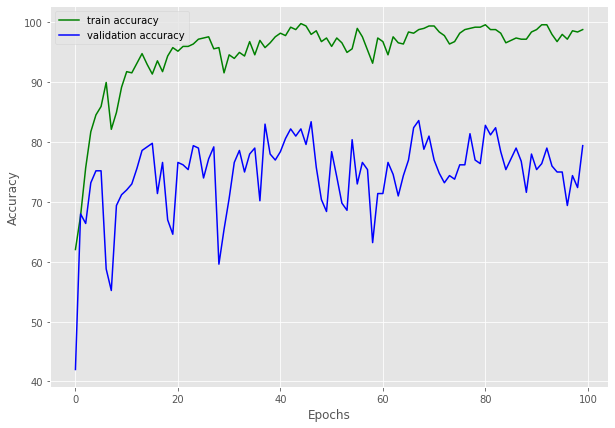

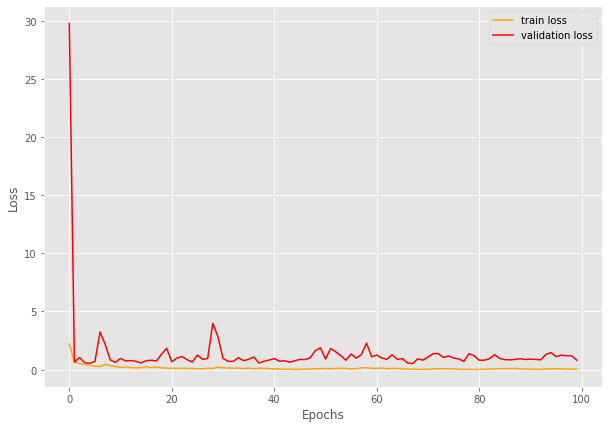

Saving model...
TRAINING COMPLETE


In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(train_accuracy, color='green', label='train accuracy')
plt.plot(val_accuracy, color='blue', label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(f"../Euron/chap08/img/{acc_plot_name}.png")
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(train_loss, color='orange', label='train loss')
plt.plot(val_loss, color='red', label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(f"../Euron/chap08/img/{loss_plot_name}.png")
plt.show()

print('Saving model...')
torch.save(model.state_dict(), f"../Euron/chap08/img/{model_name}.pth")
print('TRAINING COMPLETE')